# Sentiment Analysis of Movie Reviews
**Internship Task - CodeClause**

**NAME: GOWRY P P**

This project applies Natural Language Processing (NLP) to classify movie reviews as positive or negative using the NLTK movie reviews dataset.

Also experimenting with K-Means clustering as an optional bonus.


## Setting up Environment, Libraries: pandas, nltk, sklearn, matplotlib, seaborn

In [12]:
!pip install pandas nltk scikit-learn matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable


## NLTK's sample dataset:

In [15]:
import nltk
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

docs = [(list(movie_reviews.words(fileid)), category)
        for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids(category)]


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\gowry\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


## Text Preprocessing

- Cleans the text so the model can understand it.
- Makes your text clean and uniform.
- Removes unnecessary words (like stopwords and punctuation).
- Helps machine learning models focus on the important parts.


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gowry\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gowry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gowry\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Apply preprocessing:

In [21]:
#Randomizes the order of reviews
#Turns list of words into full sentences
#Converts text labels to numbers (1 = pos, 0 = neg)
import random
random.shuffle(docs)  # Shuffle for randomness

X = [' '.join(words) for words, label in docs]  # Join tokens into full sentences
y = [1 if label == 'pos' else 0 for words, label in docs]  # Convert labels to 1 (pos) or 0 (neg)


In [23]:
#Applies your cleaning function to every movie review

In [26]:
X_clean = [preprocess(text) for text in X]


In [28]:
#Optional: Check what’s inside X and y
print(X[0])  # First review
print(y[0])  # Its sentiment label (1 or 0)


when i initially set out to review this film , my tag line was going to be " you too can believe whales can fly " . then it was going to be " you too can believe pastel triangles can fly " . then , it was going to be " you too can believe wood sprites can fly " . finally , i just gave up trying to come up with a tag line and decided to say . . . there ' s a lot of flying going on in this film ! as our first host steve martin tells us , the original concept behind fantasia was to bring it out every year with some old segments retained and some new segments added in . well apparently that plan fell by the wayside for a while , because approximately sixty years have passed since the original classic was released . part of this might have something to do with the cold reception the film got when it was first released in 1940 ( grossing somewhere close to $ 110 , 000 in its original month of release ) . subsequent re - releases of the film have elevated the popularity of the film to the cla

## Feature Extraction – TF-IDF Vectorization

In [31]:
#convert the cleaned text (X_clean) into numerical form using TF-IDF.
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned reviews
X_vectorized = vectorizer.fit_transform(X_clean)

# Check the shape
print("TF-IDF matrix shape:", X_vectorized.shape)


TF-IDF matrix shape: (2000, 5000)


## Build Sentiment Classifier – Logistic Regression

In [34]:
#split the dataset and train a model to classify reviews.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8525

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       200
           1       0.85      0.85      0.85       200

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



## K-Means Clustering

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np

# Fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_vectorized)

# Show the clustering results compared to actual sentiment labels
conf_matrix = confusion_matrix(y, kmeans.labels_)
print("Confusion Matrix for KMeans:\n", conf_matrix)


Confusion Matrix for KMeans:
 [[252 748]
 [202 798]]


## Visualize Sentiment Distribution

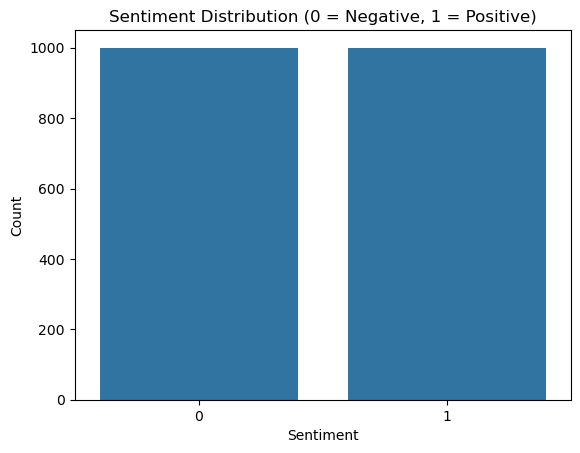

In [40]:
#see how many reviews are positive vs. negative.
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y)
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


##  Conclusion
- Successfully cleaned and processed movie reviews using NLTK.
- Applied TF-IDF to convert text to numerical data.
- Built a Logistic Regression classifier that performed well on sentiment classification.
- Optionally explored K-Means clustering to group reviews.

This project demonstrated core NLP tasks like preprocessing, feature extraction, classification, and clustering.